<div class="alert alert-block alert-info">
<h3>Student Information</h3> Please provide information about yourself.<br>
<b>Name</b>: Jake Truongcao<br>
<b>NetID</b>: jt919<br>
<b>Recitation (01/02/90/91)</b>: 91<br>
<b>Notes to Grader</b> (optional):<br>
<br><br>
<b>IMPORTANT</b>
Your work will not be graded withour your initials below<br>
I certify that this lab represents my own work and I have read the RU academic intergrity policies at<br>
<a href="https://www.cs.rutgers.edu/academic-integrity/introduction">https://www.cs.rutgers.edu/academic-integrity/introduction </a><br>
<b>Your Initials</b>: JT  


<h3>Grader Notes</h3>
<b>Your Grade<b>:<br>
<b>Grader Initials</b>:<br>
<b>Grader Comments</b> (optional):<br>
</div>

## CS 439 - Introduction to Data Science
### Fall 2021

# Lab 4: Kernel Density Estimators

#### Due Date : Wednesday October 27th on or before 11:59 PM ####

## Objective

In this lab you will get some practice in plotting, applying data transformations, and working with kernel density estimators.  We will be working with data from the World Bank containing various statistics for countries and territories around the world.  

### Instructions
This lab is presented as a notebook. Please execute the cells that are already completed and your task is to fill in the code
between ### BEGIN SOLUTION ### and ### END SOLUTION ###. We encourage you not to add any cells to this notebook. This helps us standardize our grading process. Thank you for complying with this request.


### Collaboration Policy

Data science is a collaborative activity. While you may talk with others about the labs, we ask that you **write your solutions individually**. 



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

plt.style.use('fivethirtyeight') # Use plt.style.available to see more styles
sns.set()
sns.set_context("talk")
%matplotlib inline

## Load Data

Now, let us load some World Bank data into a pandas.DataFrame object named ```wb```.

In [2]:
wb = pd.read_csv("data/world_bank_misc.csv", index_col=0)
wb.head()

,Primary completion rate: Male: % of relevant age group: 2015,Primary completion rate: Female: % of relevant age group: 2015,Lower secondary completion rate: Male: % of relevant age group: 2015,Lower secondary completion rate: Female: % of relevant age group: 2015,Youth literacy rate: Male: % of ages 15-24: 2005-14,Youth literacy rate: Female: % of ages 15-24: 2005-14,Adult literacy rate: Male: % ages 15 and older: 2005-14,Adult literacy rate: Female: % ages 15 and older: 2005-14,Students at lowest proficiency on PISA: Mathematics: % of 15 year-olds: 2015,Students at lowest proficiency on PISA: Reading: % of 15 year-olds: 2015,...,Access to improved sanitation facilities: % of population: 1990,Access to improved sanitation facilities: % of population: 2015,Child immunization rate: Measles: % of children ages 12-23 months: 2015,Child immunization rate: DTP3: % of children ages 12-23 months: 2015,Children with acute respiratory infection taken to health provider: % of children under age 5 with ARI: 2009-2016,Children with diarrhea who received oral rehydration and continuous feeding: % of children under age 5 with diarrhea: 2009-2016,Children sleeping under treated bed nets: % of children under age 5: 2009-2016,Children with fever receiving antimalarial drugs: % of children under age 5 with fever: 2009-2016,Tuberculosis: Treatment success rate: % of new cases: 2014,Tuberculosis: Cases detection rate: % of new estimated cases: 2015
Afghanistan,NaN,NaN,NaN,NaN,62.0,32.0,45.0,18.0,NaN,NaN,...,21.0,32.0,68.0,78.0,62.0,41.0,4.6,11.8,87.0,58.0
Albania,108.0,105.0,97.0,97.0,99.0,99.0,98.0,96.0,26.0,7.0,...,78.0,93.0,98.0,98.0,70.0,63.0,NaN,NaN,88.0,76.0
Algeria,106.0,105.0,68.0,85.0,96.0,92.0,83.0,68.0,51.0,11.0,...,80.0,88.0,95.0,95.0,66.0,42.0,NaN,NaN,88.0,80.0
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,61.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.0
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,100.0,96.0,97.0,NaN,NaN,NaN,NaN,83.0,87.0


List the columns of the data frame with their descriptions

In [4]:
## BEGIN SOLUTION
wb.columns
## END SOLUTION

Index(['Primary completion rate: Male: % of relevant age group: 2015',
       'Primary completion rate: Female: % of relevant age group: 2015',
       'Lower secondary completion rate: Male: % of relevant age group: 2015',
       'Lower secondary completion rate: Female: % of relevant age group: 2015',
       'Youth literacy rate: Male: % of ages 15-24: 2005-14',
       'Youth literacy rate: Female: % of ages 15-24: 2005-14',
       'Adult literacy rate: Male: % ages 15 and older: 2005-14',
       'Adult literacy rate: Female: % ages 15 and older: 2005-14',
       'Students at lowest proficiency on PISA: Mathematics: % of 15 year-olds: 2015',
       'Students at lowest proficiency on PISA: Reading: % of 15 year-olds: 2015',
       'Students at lowest proficiency on PISA: Science: % of 15 year-olds: 2015',
       'Population: millions: 2016', 'Surface area: sq. km thousands: 2016',
       'Population density: people per sq. km: 2016',
       'Gross national income, Atlas method: $ billi

# Part 1: Scaling

## Question 1.1
In the first part of this assignment we will look at the distribution of values for female adult literacy rate as well as the gross national income per capita. Create two series that contains data on literature and income 

In [49]:
## BEGIN SOLUTION
falr = wb.iloc[:, [7]].squeeze()
gnipc = wb.iloc[:, [15]].squeeze()

df = falr.to_frame().join(gnipc)
df.columns = ['literacy', 'income']
## END SOLUTION

In [54]:
# inspect the head of df
df.head(5)

,literacy,income
Afghanistan,18.0,580.0
Albania,96.0,4250.0
Algeria,68.0,4270.0
American Samoa,NaN,NaN
Andorra,NaN,NaN


## Question 1.2

Suppose we wanted to build a histogram of our data to understand the distribution of literacy rates and income per capita individually. The `countplot` can help create histograms from categorical data. Obtain the plots as shown below with the exact lables. 

C:\Users\jaket\AppData\Local\Temp/ipykernel_18672/1869611654.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


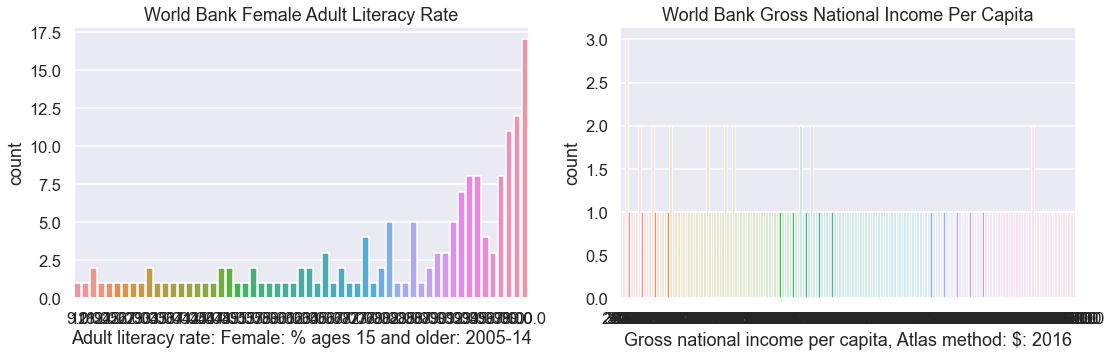

In [73]:
## BEGIN SOLUTION
###Just use countplot for each column separately
fig, ax =plt.subplots(1,2, figsize=(16, 5))

plot1 = sns.countplot(x='literacy', data=df, ax=ax[0])
plot1.set_xlabel('Adult literacy rate: Female: % ages 15 and older: 2005-14')
plot1.set_title("World Bank Female Adult Literacy Rate")

plot2 = sns.countplot(x='income', data=df, ax=ax[1])
plot2.set_xlabel('Gross national income per capita, Atlas method: $: 2016')
plot2.set_title("World Bank Gross National Income Per Capita")

fig.show()
## END SOLUTION

## Question 1.3
In the cell below, concisely explain why `countplot` is NOT the right tool for the job.

In [76]:
### BEGIN SOLUTION
answer = """Countplot is not the right tool because it is very rare for countries ot share a literacy rate or income, since these values are continuous."""
answer

### END SOLUTION

'Countplot is not the right tool because it is very rare for countries ot share a literacy rate or income, since these values are continuous.'

## Question 1.4
An alternate type of plot is the `barplot`, which as you'll obtain below, provides some vague idea of the distribution, but this is also not what we want.

C:\Users\jaket\AppData\Local\Temp/ipykernel_18672/3590172319.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\jaket\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jaket\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jaket\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jaket\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 153 missing from current font.
  font.se

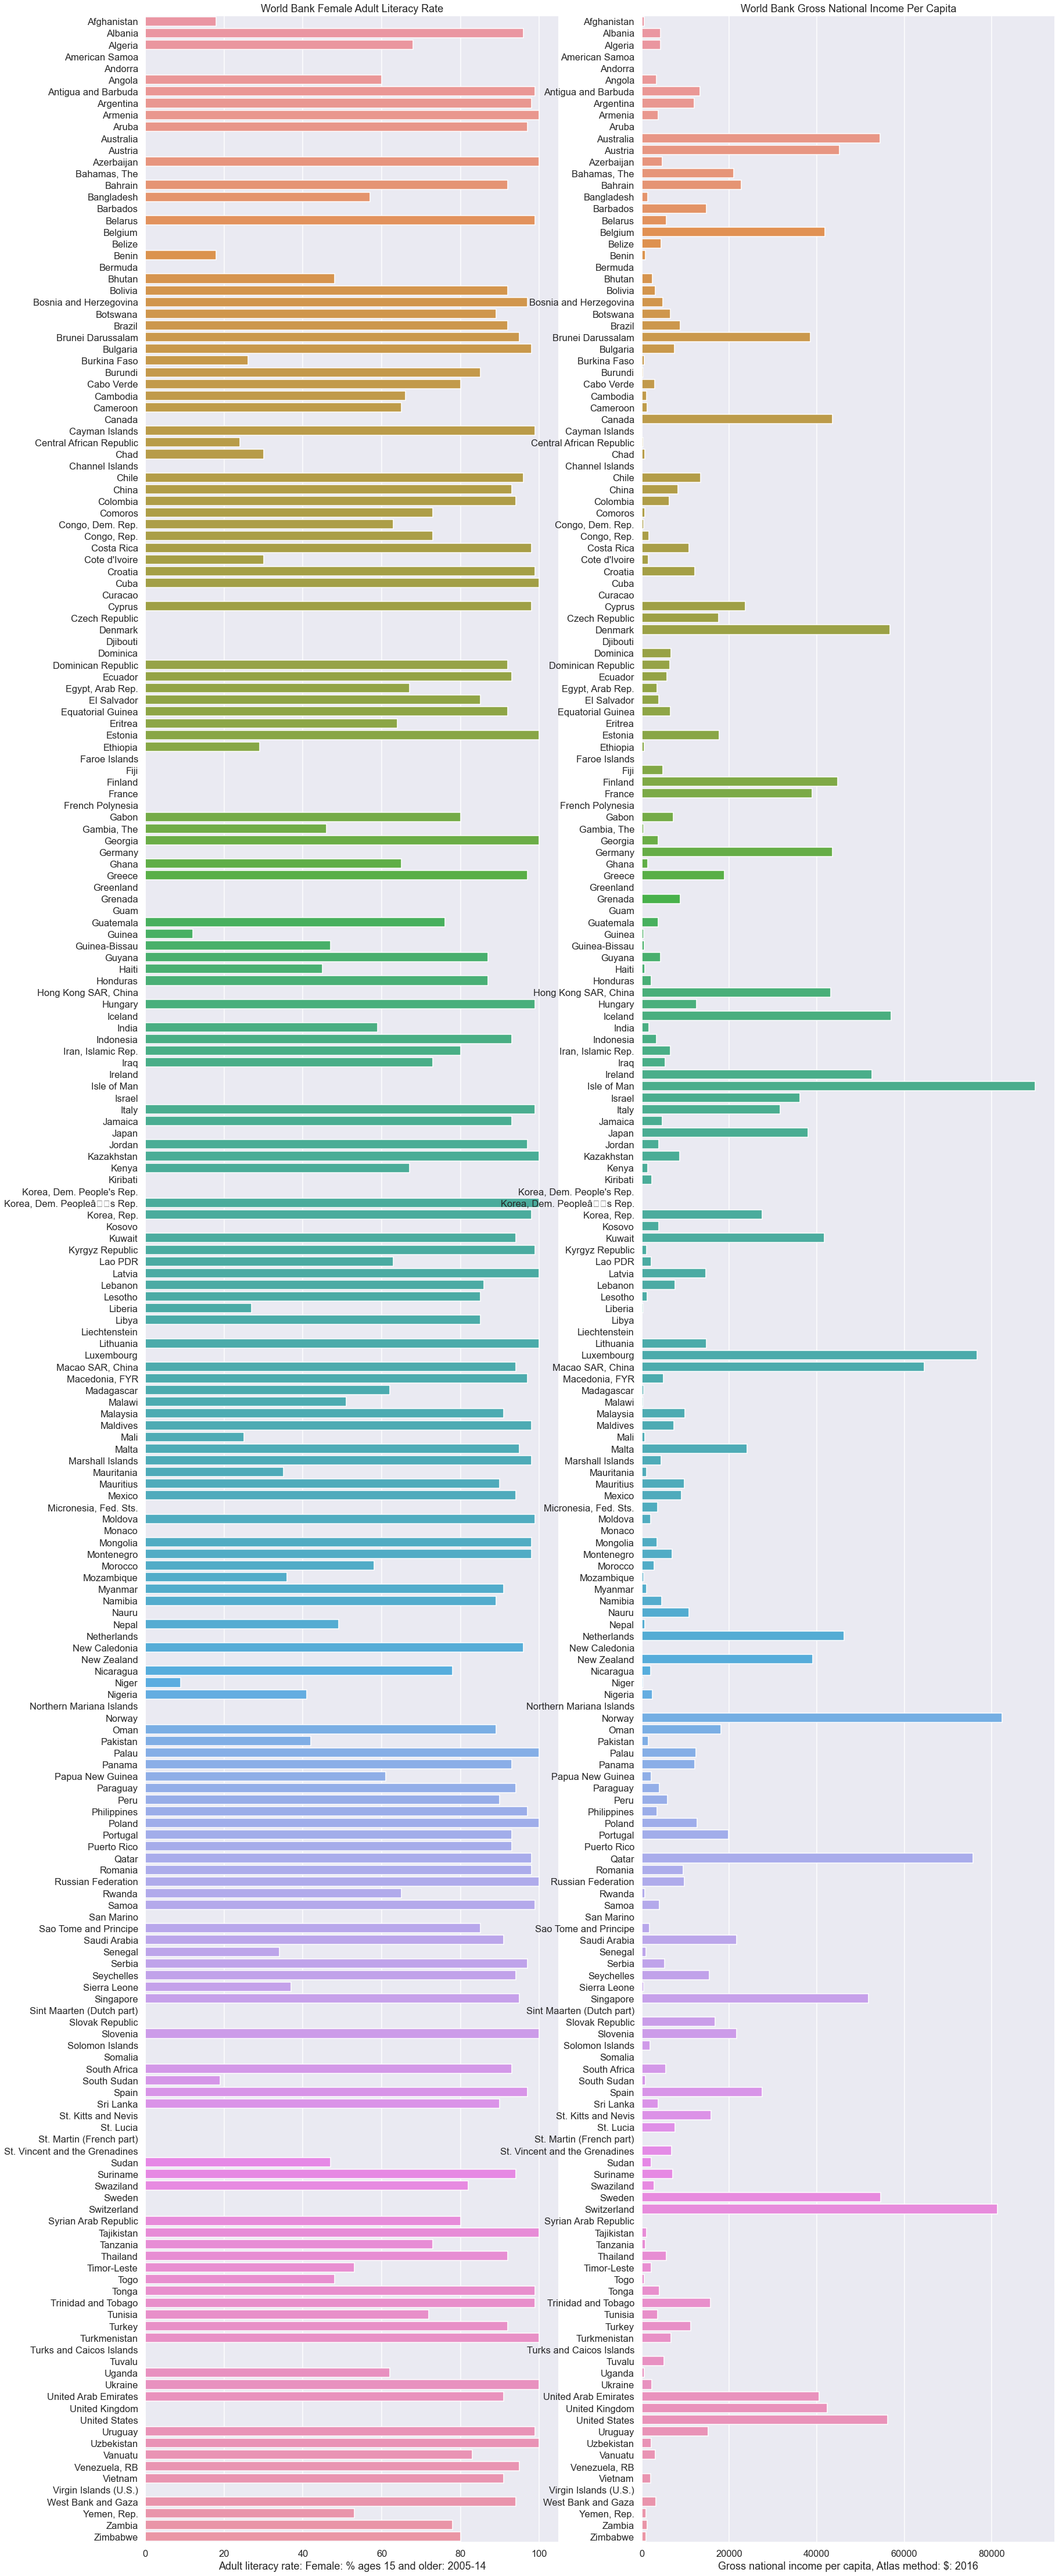

In [88]:
## BEGIN SOLUTION
fig, ax =plt.subplots(1,2, figsize=(25, 80))

plot1 = sns.barplot(x='literacy', y=df.index, data=df, ax=ax[0])
plot1.set_xlabel('Adult literacy rate: Female: % ages 15 and older: 2005-14')
plot1.set_title("World Bank Female Adult Literacy Rate")

plot2 = sns.barplot(x='income', y=df.index, data=df, ax=ax[1])
plot2.set_xlabel('Gross national income per capita, Atlas method: $: 2016')
plot2.set_title("World Bank Gross National Income Per Capita")


fig.show()
# END SOLUTION

## Question 1.5

In the cell below, create a plot of literacy rate and income per capita using the `distplot` function. As above, you should have two subplots, where the left subplot is literacy, and the right subplot is income. When you call `distplot`, set the `kde` parameter to false, e.g. `distplot(s, kde=False)`.

Don't forget to title the plot and label axes!

**Hint: ** *Copy and paste from above to start.*

C:\Users\jaket\AppData\Local\Temp/ipykernel_18672/2538192712.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


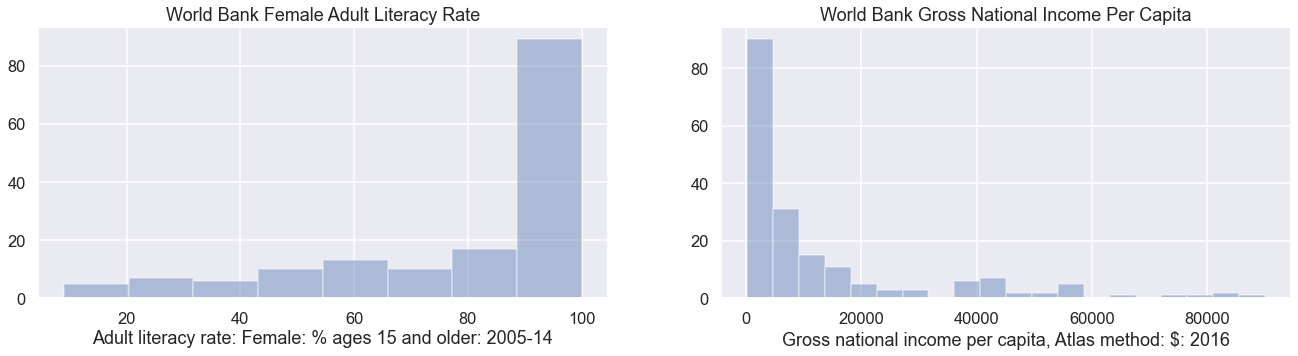

In [96]:
### BEGIN SOLUTION
fig, ax =plt.subplots(1,2, figsize=(20, 5))

plot1 = sns.distplot(x=df['literacy'], ax=ax[0], kde=False)
plot1.set_xlabel('Adult literacy rate: Female: % ages 15 and older: 2005-14')
plot1.set_title("World Bank Female Adult Literacy Rate")

plot2 = sns.distplot(x=df['income'], ax=ax[1], kde=False)
plot2.set_xlabel('Gross national income per capita, Atlas method: $: 2016')
plot2.set_title("World Bank Gross National Income Per Capita")


fig.show()
### END SOLUTION

You should see histograms that show the counts of how many data points appear in each bin. `distplot` uses a heuristic called the Freedman-Diaconis rule (https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule) to automatically identify the best bin sizes, though it is possible to set the bins yourself (we won't).

## Question 1.6
In the cell below, try creating the exact same plot again(using seaborn (sns)), but this time set the `kde` parameter to False and the `rug` parameter to True. The kde is the kernel density estimator parameter.

C:\Users\jaket\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jaket\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\jaket\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  war

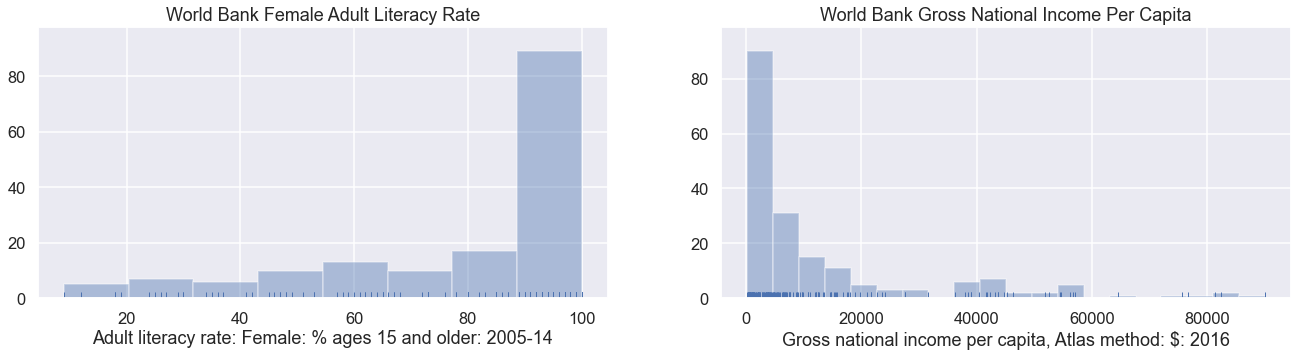

In [102]:
### BEGIN SOLUTION
fig, ax =plt.subplots(1,2, figsize=(20, 5));

plot1 = sns.distplot(x=df['literacy'], ax=ax[0], kde=False, rug=True);
plot1.set_xlabel('Adult literacy rate: Female: % ages 15 and older: 2005-14');
plot1.set_title("World Bank Female Adult Literacy Rate");

plot2 = sns.distplot(x=df['income'], ax=ax[1], kde=False, rug=True);
plot2.set_xlabel('Gross national income per capita, Atlas method: $: 2016');
plot2.set_title("World Bank Gross National Income Per Capita");

fig.show();
### END SOLUTION

# Question 1.7
Above, you should see little lines at the bottom of the plot showing the actual data points. In the cell below, let's do one last tweak and plot with the `kde` parameter set to True.

C:\Users\jaket\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jaket\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\jaket\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  war

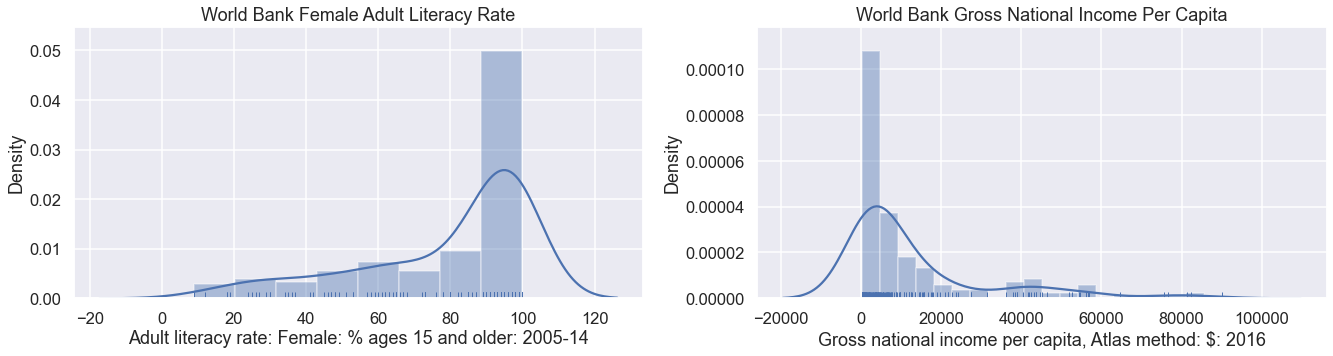

In [105]:
### BEGIN SOLUTION
fig, ax =plt.subplots(1,2, figsize=(20, 5));

plot1 = sns.distplot(x=df['literacy'], ax=ax[0], kde=True, rug=True);
plot1.set_xlabel('Adult literacy rate: Female: % ages 15 and older: 2005-14');
plot1.set_title("World Bank Female Adult Literacy Rate");

plot2 = sns.distplot(x=df['income'], ax=ax[1], kde=True, rug=True);
plot2.set_xlabel('Gross national income per capita, Atlas method: $: 2016');
plot2.set_title("World Bank Gross National Income Per Capita");

fig.show();
### END SOLUTION

You should see roughly the same histogram as before. However, now you should see an overlaid smooth line. This is the kernel density estimate discussed in class. 

Observations:
* You'll also see that the y-axis value is no longer the count. Instead it is a value such tha the total area under the KDE curve is 1. The KDE estimates the underlying probability density function of the given variable. 
* The KDE is just an estimate, and we can see that it makes some silly decisions, e.g. assigning a non-zero probability of a greater than 100% literacy rate. 

We'll talk more about KDEs later in this lab.

## Question 1.8

Looking at the income data, it is difficult to see the distribution among high income (> $30000) countries, and the KDE also has a funny artifact where the probability density function has little bumps just above zero that correspond to the wealthy outlying countries.

We can logarithmically transform the `income` data to give us a visual representation that makes it easier to see patterns and also give a more reasonable KDE.

In the cell below, make a distribution plot with the data transformed using `np.log10` with `kde=True`. Be sure to correct the axis label using `plt.xlabel`. If you want to see the exact counts, just set `kde=False`.

C:\Users\jaket\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jaket\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\jaket\AppData\Local\Temp/ipykernel_18672/981881173.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


<Figure size 432x288 with 0 Axes>

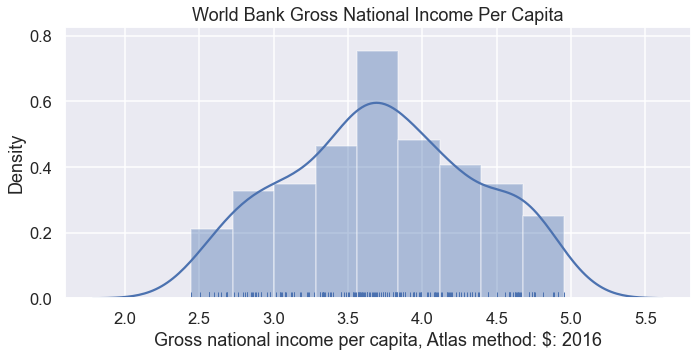

In [110]:
plt.figure()
...

### BEGIN SOLUTION
### transfer all the data 'x' in income column to 'np.log10(x)' and then plot
fig, ax =plt.subplots(1,1, figsize=(10, 5));

plot2 = sns.distplot(x=np.log10(df['income']), ax=ax, kde=True, rug=True);
plot2.set_xlabel('Gross national income per capita, Atlas method: $: 2016');
plot2.set_title("World Bank Gross National Income Per Capita");

fig.show();
### END SOLUTION


# Part 2: Kernel Density Estimation

In this part of the lab you will develop a deeper understanding of how kernel destiny estimation works. This section assumes that you are familiar with the basic idea of the KDE.

Suppose we have 3 data points with values 2, 4, and 9. We can compute the (useless) histogram as shown below.

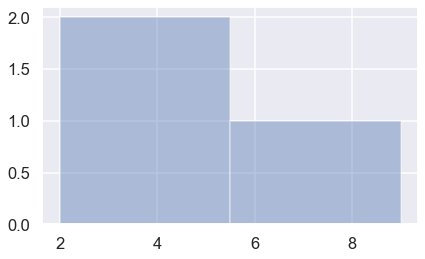

In [39]:
data3pts = np.array([2, 4, 9])
sns.distplot(data3pts, kde = False);

By setting `kde=True`, we can see a kernel density estimate of the data.

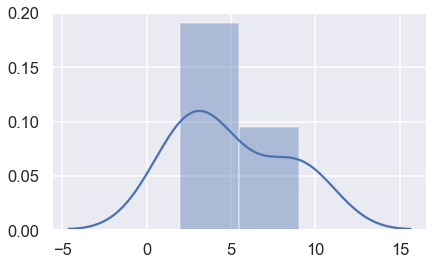

In [40]:
sns.distplot(data3pts, kde = True);

One question you might be wondering is how the kernel density estimator decides how "wide" each point should be. It turns out this is a parameter you can set called `bw`, which stands for bandwith. For example, the code below gives a bandwith value of 0.5 to each data point. You'll see the resulting kde is quite different. Try experimenting with different values of bandwidth and see what happens.

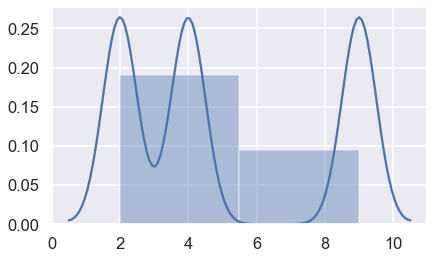

In [41]:
sns.distplot(data3pts, kde = True, kde_kws = {"bw": 0.5});

## Question 2.1

As mentioned in class, the kernel density estimate is just the sum of a bunch of copies of the kernel, each centered on our data points. For those of you familiar with the idea of "convolution", the KDE is simply the convolution of the kernel with the data. The default kernel used by the `distplot` function is the Guassian kernel, given by:

$$\Large
K_\alpha(x, z) = \frac{1}{\sqrt{2 \pi \alpha^2}} \exp\left(-\frac{(x - z)^2}{2  \alpha ^2} \right)
$$

In Python code, this function is given as below, where `alpha` is the parameter $\alpha$, `z` is the x coordinate of the center of the Gaussian (i.e. a data point), and `x` is the independent variable. The function header is given below. Complete the function body using the formula above. You might find function such as np.exp can be helpful.

In [42]:
## BEGIN SOLUTION

# def gaussian_kernel(alpha, x, z):
   


## END SOLUTION

For example, we can plot the gaussian kernel centered on $x$ coordinate 9 with $\alpha$ = 0.5 as below: 

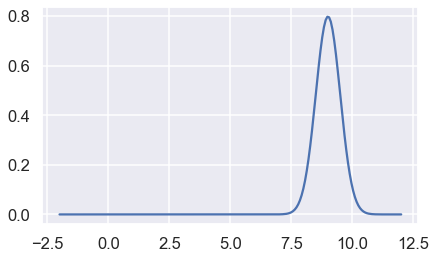

In [43]:
xs = np.linspace(-2, 12, 200)
alpha=0.5
kde_curve = [gaussian_kernel(alpha, x, 9) for x in xs]
plt.plot(xs, kde_curve);

## Question 2.2
In the cell below, plot the 3 kernel density functions corresponding to our 3 data points on the same axis. Use an `alpha` value of 0.5.

**Hint: ** *The `gaussian_kernel` function can take a numpy array as an argument for `z`*.

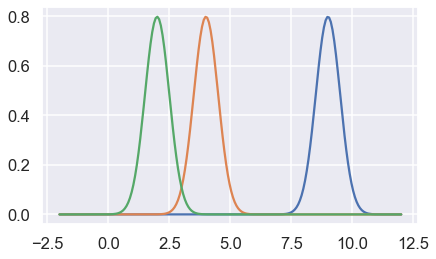

In [44]:
### BEGIN SOLUTION

### END SOLUTION

## Question 2.3
In the cell below, create a plot showing the sum of all three of the kernels above. Your plot should closely resemble the kde shown when you called `distplot` function with bandwidth 0.5 earlier.

**Hint: ** *Consider using np.sum with the argument `axis = 1`.*

**Hint: ** *Make sure to normalize your kernels!*

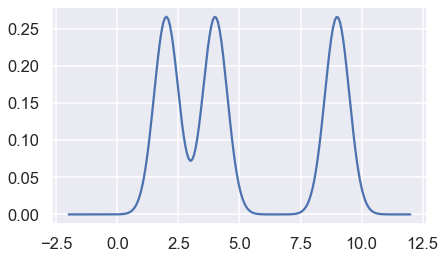

In [45]:
### BEGIN SOLUTION



### END SOLUTION

## Question 2.4

Recall that earlier we plotted the kernel density estimation for the logarithm of the income data. Plot it again as shown below.

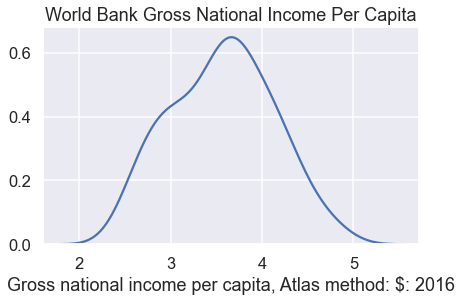

In [46]:
## BEGIN SOLUTION



## END SOLUTION

## Question 2.5
In the cell below, make a similar plot using your technique from question 2a. Give an estimate of the $\alpha$ value chosen by the `sns.distplot` function by tweaking your `alpha` value until your plot looks almost the same.

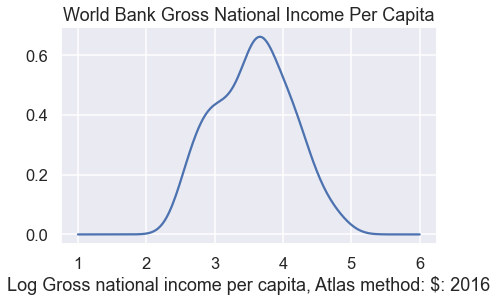

In [48]:
### BEGIN SOLUTION


### END SOLUTION

## Question 2.6

In your answers above, you hard coded a lot of your work. In this problem, you'll build a more general kernel density estimator function.

Implement the KDE function which computes:

$$\Large
f_\alpha(x) = \frac{1}{n} \sum_{i=1}^n K_\alpha(x, z_i)
$$

Where $z_i$ are the data, $\alpha$ is a parameter to control the smoothness, and $K_\alpha$ is the kernel density function passed as `kernel`.

In [49]:
def kde(kernel, alpha, x, data):
    """
    Compute the kernel density estimate for the single query point x.

    Args:
        kernel: a kernel function with 3 parameters: alpha, x, data
        alpha: the smoothing parameter to pass to the kernel
        x: a single query point (in one dimension)
        data: a numpy array of data points

    Returns:
        The smoothed estimate at the query point x
    """
    ...
    
    ### BEGIN SOLUTION
 
    
    
    ### END SOLUTION

Assuming you implemented `kde` correctly, the code below should generate the `kde` of the log of the income data as before.

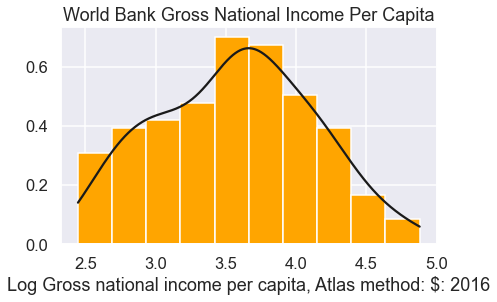

In [51]:
df['trans_inc'] = np.log10(df['income'])
xs = np.linspace(df['trans_inc'].min(), df['trans_inc'].max(), 1000)
curve = [kde(gaussian_kernel, alpha, x, df['trans_inc']) for x in xs]
plt.hist(df['trans_inc'], density=True, color='orange') ### use density instead of normed here
plt.title('World Bank Gross National Income Per Capita')
plt.xlabel('Log Gross national income per capita, Atlas method: $: 2016');
plt.plot(xs, curve, 'k-');

## Question 2.7
And the code below should show a 3 x 3 set of plots showing the output of the kde for different `alpha` values.

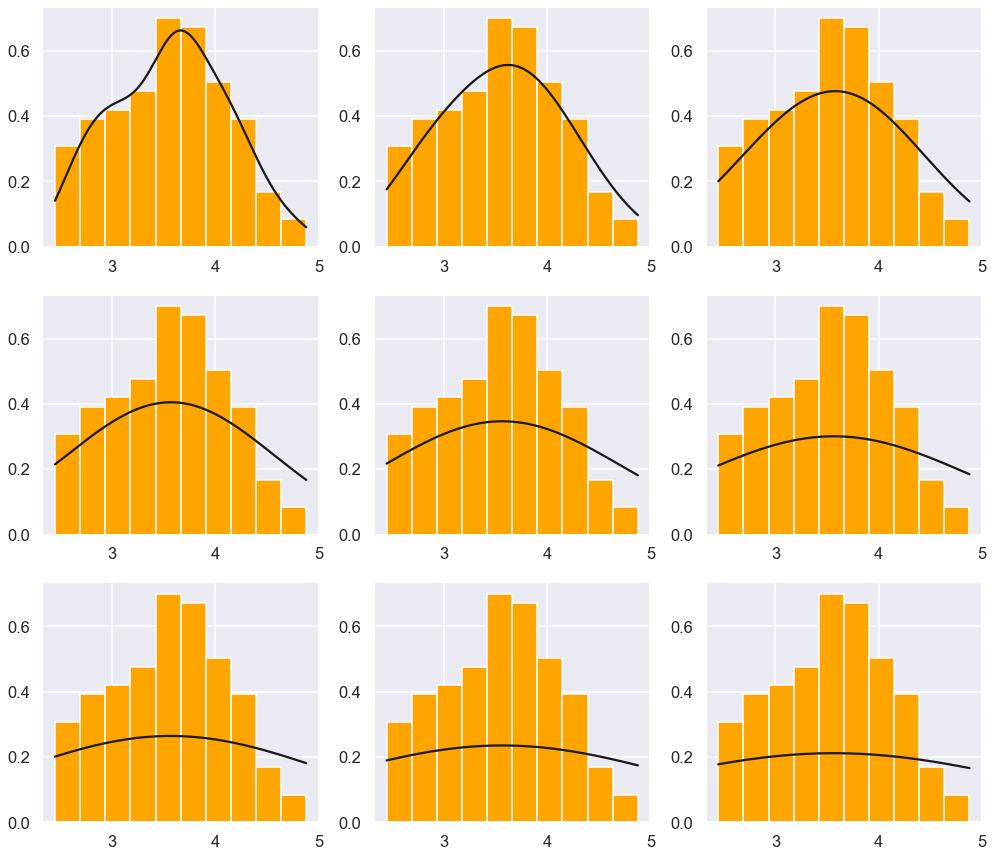

In [54]:


plt.figure(figsize=(15,15))
alphas = np.arange(0.2, 2.0, 0.2)
for i, alpha in enumerate(alphas):
    plt.subplot(3, 3, i+1)
    xs = np.linspace(df['trans_inc'].min(), df['trans_inc'].max(), 1000)
    curve = [kde(gaussian_kernel, alpha, x, df['trans_inc']) for x in xs]
    plt.hist(df['trans_inc'], density=True, color='orange') ### use density instead of normed here
    plt.plot(xs, curve, 'k-')
plt.show()



Let's take a look at another kernel, the Boxcar kernel.

In [55]:
def boxcar_kernel(alpha, x, z):
    return (((x-z)>=-alpha/2)&((x-z)<=alpha/2))/alpha

Run the cell below to enable interactive plots. It should give you a validating 'OK' when it's finished.

In [56]:
from ipywidgets import interact
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


Now, we can plot the Boxcar and Gaussian kernel functions to see what they look like.

In [57]:
import numpy as np
x = np.linspace(-10,10,1000)
def f(alpha):
    plt.plot(x, boxcar_kernel(alpha,x,0), label='Boxcar')
    plt.plot(x, gaussian_kernel(alpha,x,0), label='Gaussian')
    plt.legend(title='Kernel Function')
    plt.show()
interact(f, alpha=(1,10,0.1));

interactive(children=(FloatSlider(value=5.0, description='alpha', max=10.0, min=1.0), Output()), _dom_classes=…

Using the interactive plot below compare the the two kernel techniques:  (Generating the KDE plot is slow, so you may expect some latency after you move the slider)

In [59]:
xs = np.linspace(df['trans_inc'].min(), df['trans_inc'].max(), 1000)
def f(alpha_g, alpha_b):
    plt.hist(df['trans_inc'], density=True, color='orange') ### use density instead of normed here
    g_curve = [kde(gaussian_kernel, alpha_g, x, df['trans_inc']) for x in xs]
    plt.plot(xs, g_curve, 'k-', label='Gaussian')
    b_curve = [kde(boxcar_kernel, alpha_b, x, df['trans_inc']) for x in xs]
    plt.plot(xs, b_curve, 'r-', label='Boxcar')
    plt.legend(title='Kernel Function')
    plt.show()
interact(f, alpha_g=(0.01,.5,0.01), alpha_b=(0.01,3,0.1));

interactive(children=(FloatSlider(value=0.25, description='alpha_g', max=0.5, min=0.01, step=0.01), FloatSlide…

<b>TASK: </b> Briefly compare and contrast the Gaussian and Boxcar kernels. Edit this cell to write your answers.

<div class="alert alert-block alert-info">
<h2>Lab Feedback (2 points) </h2> 
<b> Practicality:</b> 1(lowest)  10 (highest) : <br>
<b> Time to complete (in hours): </b>  <br>
<b> How to improve this lab? </b> Please provide constructive feedback <br>
</div>

<div class="alert alert-block alert-info">
<h2>Submission Instructions</h2> 
<b> File Name:</b> Please name the file as your_section_your_netID_Lab4.jpynb<br>
<b> Submit To: </b> Canvas &rarr; Assignments &rarr; Lab4 <br>
<b>Warning:</b> Failure to follow directions may result in loss points.<br>
</div>

<b> @2021 A.D. Gunawardena. All Rights Reserved. </b> <br> DO NOT post this lab on public sites or share with anyone. Lab is provided for F21-CS 439 only<br>
<br>
<b>Credits</b>: Josh Hug, Berkeley Data Science Group and Steve Skiena for original ideas for this lab.